# * Copyright (C) Jonathan Kernaghan - All Rights Reserved
# * Unauthorized copying of this file, via any medium is strictly prohibited
# * Proprietary and confidential
# * Written by Jonathan Kernaghan <jkernaghan272@gmail.com>, December 2022

Information - For this task of regression, which is the prediction of a continuous variable I have used the "tips" dataset, whereby my target varaible i.e. the thing I will be predicting is the tip amount based on the other variables total_bill, sex, smoker, day, time and size.

This jupyter notebook contains exploratory data analysis, which is useful for learning about the dataset, determining the transformations required to clean the data as well as feature engineering steps.

Please see scripts/3_regression_example.py for the model creation and evaluation in the form of a pipeline.

In [121]:
import seaborn as sns

In [122]:
# Load the data
tips = sns.load_dataset("tips")

In [123]:
# Take a look at 10 sample from the tips dataset, each row is one observation of the bill, tip etc for a given party at a table
tips.sample(10)

,total_bill,tip,sex,smoker,day,time,size
179,34.63,3.55,Male,Yes,Sun,Dinner,2
140,17.47,3.50,Female,No,Thur,Lunch,2
20,17.92,4.08,Male,No,Sat,Dinner,2
22,15.77,2.23,Female,No,Sat,Dinner,2
42,13.94,3.06,Male,No,Sun,Dinner,2
209,12.76,2.23,Female,Yes,Sat,Dinner,2
160,21.50,3.50,Male,No,Sun,Dinner,4
134,18.26,3.25,Female,No,Thur,Lunch,2
137,14.15,2.00,Female,No,Thur,Lunch,2
217,11.59,1.50,Male,Yes,Sat,Dinner,2


In [124]:
# Lets do a quick exploratory data analysis (EDA)
print("Rows x Columns =", tips.shape, "\n")
print("Feature names =", tips.columns, "\n")
print(tips.info())

Rows x Columns = (244, 7) 

Feature names = Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None


In [125]:
# Continuous variable statistics
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


[Text(0.5, 1.0, 'Distribution of Sex')]

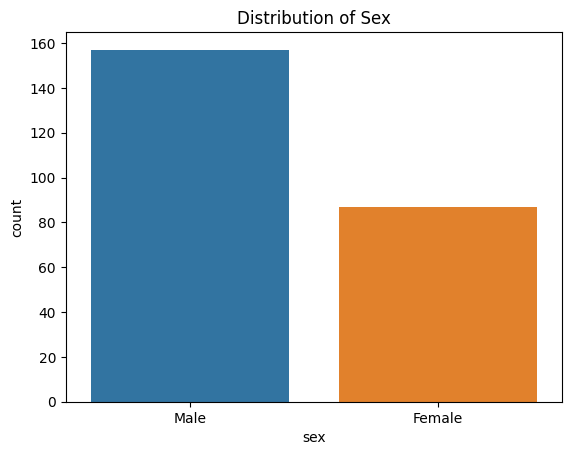

In [126]:
sns.countplot(data=tips, x="sex").set(title="Distribution of Sex")

[Text(0.5, 1.0, 'Distribution of Smoker')]

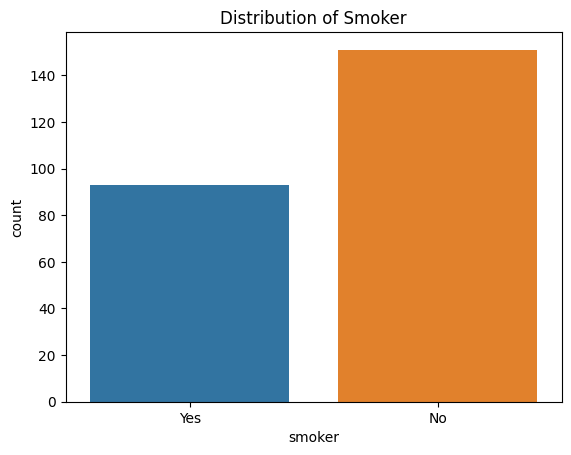

In [127]:
sns.countplot(data=tips, x="smoker").set(title="Distribution of Smoker")

[Text(0.5, 1.0, 'Distribution of Day')]

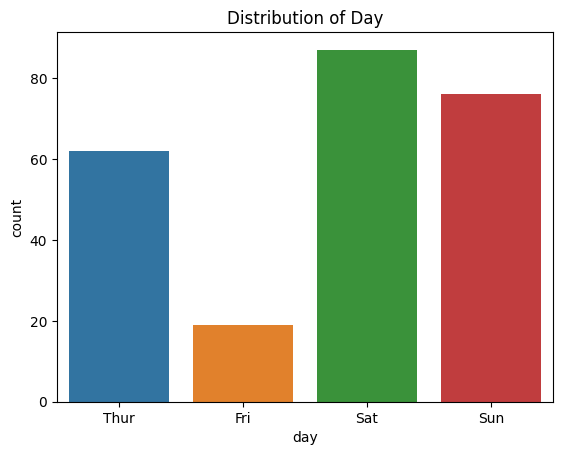

In [128]:
sns.countplot(data=tips, x="day").set(title="Distribution of Day")

[Text(0.5, 1.0, 'Distribution of Time')]

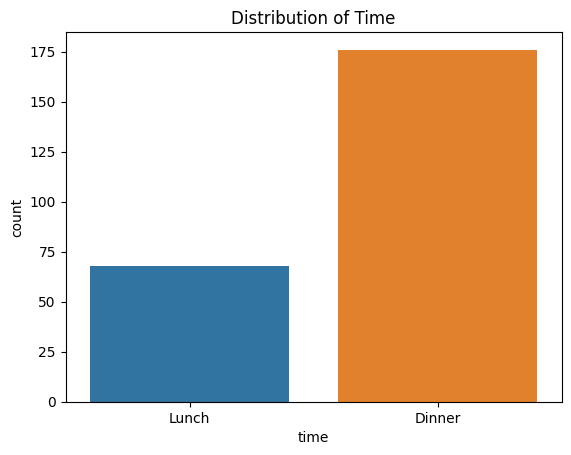

In [129]:
sns.countplot(data=tips, x="time").set(title="Distribution of Time")

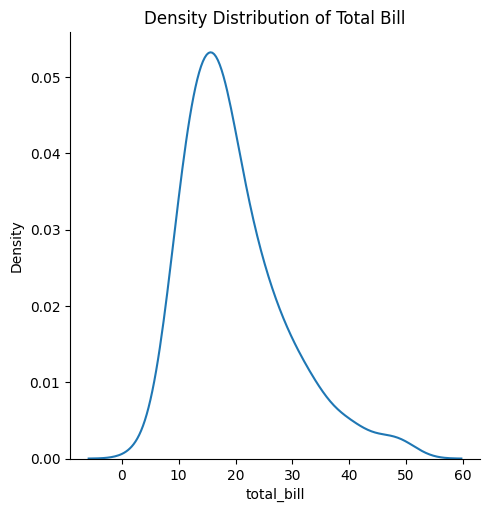

In [130]:
sns.displot(data=tips, x="total_bill", kind="kde").set(title="Density Distribution of Total Bill")

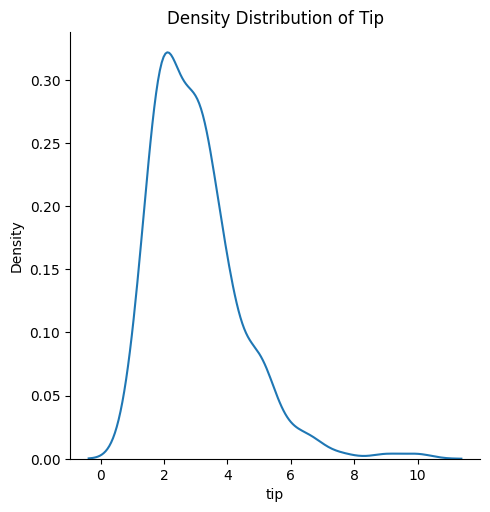

In [131]:
sns.displot(data=tips, x="tip", kind="kde").set(title="Density Distribution of Tip")

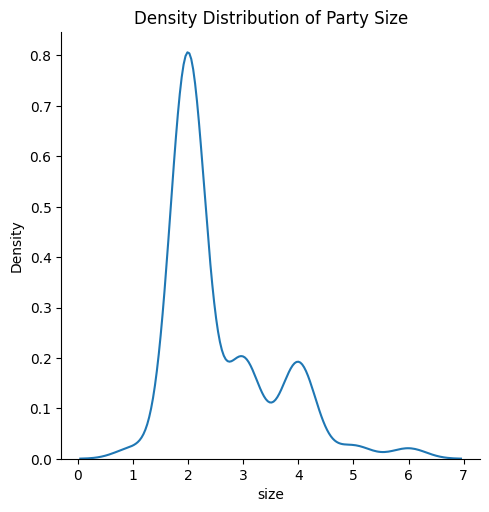

In [132]:
sns.displot(data=tips, x="size", kind="kde").set(title="Density Distribution of Party Size")

In [133]:
# Investigating the correlations of all variables converted to numeric, particularly in relation to tip amount, the target
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Min max scale the total bill feature
mix_max = MinMaxScaler()
encoded = mix_max.fit_transform(tips[["total_bill"]])
tips["total_bill_normalised"] = encoded

# One-hot Encoding the day feature
one_hot = OneHotEncoder()
encoded = one_hot.fit_transform(tips[["day"]])
tips[one_hot.categories_[0]] = encoded.toarray()

# Binary encoding features with two labels
tips["sex_int"] = tips.loc[:, "sex"].map({"Male": 0, "Female": 1}).astype(int)
tips["time_int"] = tips.loc[:, "time"].map({"Lunch": 0, "Dinner": 1}).astype(int)
tips["smoker_int"] = tips.loc[:, "smoker"].map({"No": 0, "Yes": 1}).astype(int)

In [134]:
# Raw correlation values
tips[["tip", "total_bill_normalised", "smoker_int", "sex_int", "time_int", "Fri", "Sat", "Sun", "size"]].corr()

,tip,total_bill_normalised,smoker_int,sex_int,time_int,Fri,Sat,Sun,size
tip,1.000000,0.675734,0.005929,-0.088862,0.121629,-0.055463,-0.002790,0.125114,0.489299
total_bill_normalised,0.675734,1.000000,0.085721,-0.144877,0.183118,-0.086168,0.054919,0.122953,0.598315
smoker_int,0.005929,0.085721,1.000000,-0.002816,0.054921,0.244316,0.155744,-0.181624,-0.133178
sex_int,-0.088862,-0.144877,-0.002816,1.000000,-0.205231,0.071060,-0.053957,-0.168106,-0.086195
time_int,0.121629,0.183118,0.054921,-0.205231,1.000000,-0.058159,0.462709,0.418071,0.103411
Fri,-0.055463,-0.086168,0.244316,0.071060,-0.058159,1.000000,-0.216319,-0.195451,-0.142184
Sat,-0.002790,0.054919,0.155744,-0.053957,0.462709,-0.216319,1.000000,-0.500682,-0.041121
Sun,0.125114,0.122953,-0.181624,-0.168106,0.418071,-0.195451,-0.500682,1.000000,0.193054
size,0.489299,0.598315,-0.133178,-0.086195,0.103411,-0.142184,-0.041121,0.193054,1.000000


[Text(0.5, 1.0, 'Heatmap of Correlations')]

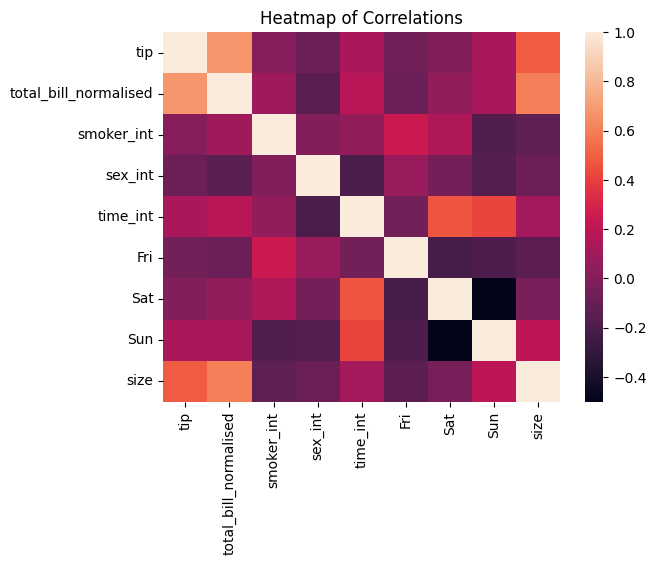

In [135]:
# Heatmap of raw correlation values
sns.heatmap(tips[["tip", "total_bill_normalised", "smoker_int", "sex_int", "time_int", "Fri", "Sat", "Sun", "size"]].corr()).set(title="Heatmap of Correlations")

[Text(0.5, 1.0, 'Relationship between Tip and Total Bill w/ Trend Line')]

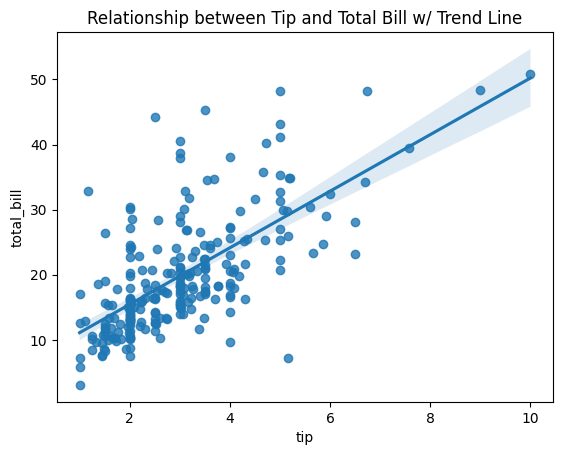

In [136]:
sns.regplot(data=tips, x="tip", y="total_bill").set(title="Relationship between Tip and Total Bill w/ Trend Line")

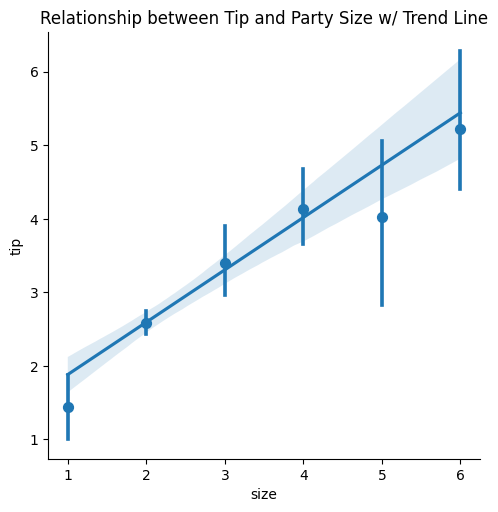

In [137]:
import numpy as np
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean).set(title="Relationship between Tip and Party Size w/ Trend Line")

Recommendations and key observations -

1) Small dataset of 244 rows, use 5-fold cross validation
2) No need to deal with missing values, there are none
3) Task is regression, so dataset has no class imbalance
4) Target variable follows a left leaning yet relatively normal distribution
5) Use linear regression as baseline
6) Use all variables, no multicollinearity
7) OHE day
8) Normalise total bill
9) Binary encode smoker, sex and time
10) Total bill and party size understood as strongest predictors of tip through EDA